In [16]:
# %matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
# matplotlib.use('TkAgg')
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib2tikz import save as tikz_save
import subprocess

In [2]:
N = int(1e4)
K = int(1e3)
X = np.arange(0, 1, 1/N)
W = np.random.normal(loc = .1/N, scale=.1/np.sqrt(N), size=(K,N))
S = np.exp(np.cumsum(W, 1)).T

In [21]:
ax.hist2d(np.repeat(X, K), S.flatten(), bins=100, norm=LogNorm());
# plt.colorbar();

In [45]:
plt.close('all')

In [44]:
# plt.plot(X,S)
fig, ax = plt.subplots(figsize=(6,3), frameon=False)
lo, hi = .45, 1.9
steps = np.array([0, 2/3, 1])

def plut(f, t, m, direction=1):
    ma, mi = m*np.power(hi, t-f), m*np.power(lo, t-f)
#     ax.vlines([t], mi, ma, colors='k', label=label)
#     ax.scatter([t, t], [mi, ma], c='k', marker='_')
    ax.plot([f,t], [m,mi], 'r:')
    ax.plot([f,t], [m,ma], 'g--')
    
    path = Path([(t,mi), (t+direction*(ma-mi)*.05, m), (t,ma)], [Path.MOVETO, Path.CURVE3, Path.CURVE3])
    patch = patches.PathPatch(path, facecolor='none', lw=1)
    ax.add_patch(patch)
    
plut(0,1,1)

plut(0,steps[1], 1, direction=-1)

for f,t in zip(steps[1:-1], steps[2:]):
    plut(f, t, np.power(hi, f), direction=-1)
    plut(f, t, np.power(lo, f), direction=-1)

ax.annotate(
    r'$\bar b(X_{2/3}\mid X_{0})$', xy=(2/3, np.power(hi, 2/3)), xytext=(.15, np.power(hi, 2/3)),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
            horizontalalignment='left',
            verticalalignment='center',
)
ax.annotate(
    r'$\bar b(X_{1}\mid \bar b(X_{2/3}\mid X_0)) = \bar b(X_{1}\mid X_{0})$', xy=(1, np.power(hi, 1)), xytext=(.15, np.power(hi, 1)),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
            horizontalalignment='left',
            verticalalignment='center',
)

ax.set_yticks([])
fig.show()

# tikz_save('../scriptie/img/timeconsistency.tex', figureheight='1.5in', figurewidth='4in')
# print(subprocess.check_output(r'cd ..\scriptie\ && git commit -a -m "img" && git pull && git push', shell=True).decode('utf-8'))

In [55]:
def f(y): x=y-1;return 1 -x/2 + x**2/3 -x**3/4 +x**4/5 - x**5/6 + x**6/7
x = np.arange(0,1,.01)+1e-4
plt.plot(x, f(x))
plt.gcf().show()

array([ 0.        ,  0.33333333,  0.66666667,  1.        ])

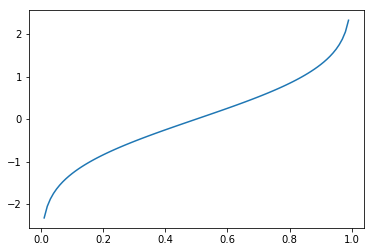

In [26]:
s = lambda l: stats.norm.ppf(l, scale=1)
x = np.arange(0,1.01,.01)
plt.plot(x, s(x))
plt.show()